# Classification

* 참고)))이미지에 대한 분류는 뒤의 CNN에서 다루기로 하고 Pass --> 일반 데이터를 가지고 수행!!

# 5.1 이항 분류

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

* 데이터 컬럼 설명    
<img src="https://drive.google.com/uc?id=1nPHdFRjtJOg7iBBPaSXYujiP7C5YzIeq">

In [3]:
# 5.1 와인 데이터셋 불러오기
# 데이터가 red, white 각기 존재함!!!
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# 5.2 와인 데이터셋 합치기
# 정답지 : red = 0, white = 1
red["type"] = 0
white["type"] =1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

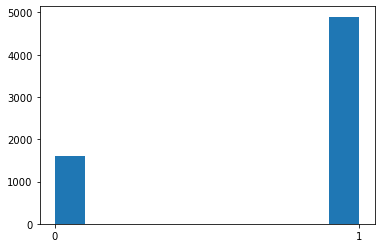

1    0.753886
0    0.246114
Name: type, dtype: float64


In [5]:
from locale import normalize
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
# --> 대략 분포가 red:white = 1:3 정도의 비율임!!!
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts(normalize=True))

<AxesSubplot:>

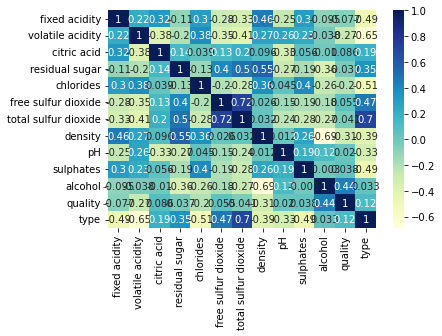

In [6]:
import seaborn as sns
correlations = wine[wine.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [7]:
# 5.4 데이터 요약 정보 확인
# --> 운이 좋게도 빵구난 데이터가 없음!!!!
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [8]:
# 5.5 데이터 정규화
# -> 학습의 안정성을 위해서 정규화 수행 : minMax Sclaer
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [9]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
406        0.495868          0.240000     0.283133        0.029141   0.089701   
4540       0.165289          0.133333     0.180723        0.050613   0.028239   
2829       0.272727          0.120000     0.192771        0.239264   0.058140   
931        0.297521          0.353333     0.006024        0.021472   0.107973   
4040       0.206612          0.106667     0.174699        0.015337   0.071429   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
406              0.027778              0.050691  0.211876  0.403101   
4540             0.121528              0.228111  0.048583  0.418605   
2829             0.104167              0.377880  0.179873  0.348837   
931              0.041667              0.073733  0.199923  0.589147   
4040             0.163194              0.412442  0.121265  0.379845   

      sulphates   alcohol   quality  type  
406    0.241573  0.405797  0.500000   0.0 

* 참고) tf.keras.utils.to_categorical --> one hot encoding으로 변경을 해준다!!!!!     
아니면 아래와 같이 만들 수 있고, 아니면 scikit learn의 onehotencoding을 사용할 수 있음!!!!     

In [10]:
# 직접 one_hot 구현 예시..
def labelMaker(val):     
    if val == 1:     
        return [1, 0, 0]     
    elif val == 2:     
        return [0, 1, 0]     
    else:      
        return [0, 0, 1]

아래 그림을 보면
   - 최종 출력단에 있어서 해당하는 카테고리에 대한 것을 표현을 해주기 위해서는 각기 종류별로 값을 나타내야 하고, 이에 대한 효율적인 표현이 바로 one-hot-encoding이기 때문에 이렇게 활용을 하여서 변형을 하는 것임!!!!!   
   - 그리고 "분류"의 문제이기 때문에 이에 대해서 최종 단에 있어서는  softmax를 활용해야 함!!!!!
   - 분류에 대한 기준이기 때문에 기준을 categorical_crossentropy로 설정을 함.

<img src="https://drive.google.com/uc?id=1smD9jnrEKhaACxvhuQmUgPNq3WHhT_wX">

In [13]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]


print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# one - hot - encoding으로 쉽게 변경 처리를 하자!!!!!!!
# --> 원하는 종류에 대해서 지정을 해야함!!!!
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0.49586777 0.24       0.28313253 0.0291411  0.089701   0.02777778
 0.05069124 0.21187584 0.40310078 0.24157303 0.4057971  0.5       ]
0.0
[0.14876033 0.11333333 0.15662651 0.04601227 0.04651163 0.05902778
 0.25115207 0.0634278  0.54263566 0.15730337 0.66666667 0.5       ]
1.0
[1. 0.]
[0. 1.]


In [14]:
train_X.shape

(5197, 12)

In [15]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(input_shape = (12,), units = 48, activation = "relu"),
        tf.keras.layers.Dense(units = 24, activation = "relu"),
        tf.keras.layers.Dense(units = 12, activation = "relu"),
        
        # output layer -> 2진 분류 -> 노드수 고정! units = 2
        tf.keras.layers.Dense(units =2, activation = "softmax")
    ]
)
model.compile( loss = "categorical_crossentropy", 
               metrics = ["accuracy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.7)
             )


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48)                624       
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


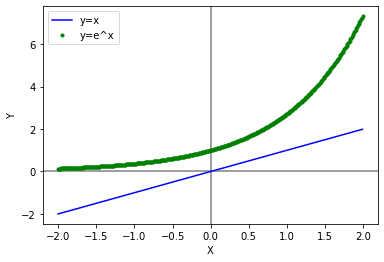

In [16]:
# 그림 5.5 출력 코드
# --> 아래 그림을 통해서 softmax 함수에서 분모에 exp를 사용하는 이유
# --> exp는 큰 값에 더 강조를 하게 되고, 작은 값은 더 약화시킴!!
# --> 이러한 부분을 바탕으로 확실하게 갈라주기 위해서 사용!!!
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [17]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 2ms/step - loss: 4.7746 - accuracy: 0.7462 - val_loss: 0.5671 - val_accuracy: 0.7492
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7537 - val_loss: 0.5953 - val_accuracy: 0.7492
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7537 - val_loss: 0.5704 - val_accuracy: 0.7492
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.7537 - val_loss: 0.5665 - val_accuracy: 0.7492
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7537 - val_loss: 0.6293 - val_accuracy: 0.7492
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7537 - val_loss: 0.5673 - val_accuracy: 0.7492
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7537 - val_loss: 0.6122 - val_accuracy: 0.7492
Epoch 

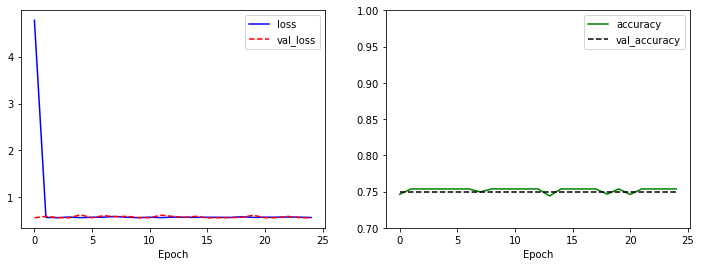

In [18]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [19]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 724us/step - loss: 0.5566 - accuracy: 0.7592


[0.5565706491470337, 0.7592307925224304]

# 5.2 다항 분류 : category의 종류가 3개 이상인 경우..

In [20]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


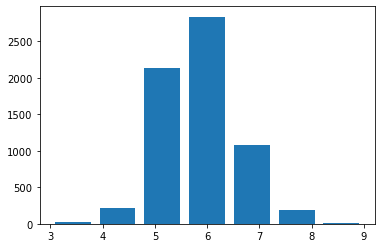

In [21]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [22]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
# wine["new_quality"] =0 
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [23]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]


train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [24]:
train_Y[0]

array([1., 0., 0.], dtype=float32)

In [25]:
train_X.shape

(5197, 12)

In [26]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model =model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(input_shape = (12,), units = 48, activation="relu"), 
     tf.keras.layers.Dense(units = 24, activation="relu"),
     tf.keras.layers.Dense(units =12, activation="relu"),

     # out layer --> 3진분류 --> 노드수!!!!!고정!! 3
     tf.keras.layers.Dense(units =3, activation = "softmax")
    ]
)
model.compile( loss = "categorical_crossentropy", 
               metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.07))

history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
122/122 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7965 - val_loss: 0.4479 - val_accuracy: 0.8138
Epoch 2/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8070 - val_loss: 0.4458 - val_accuracy: 0.8138
Epoch 3/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8004 - val_loss: 0.3967 - val_accuracy: 0.8138
Epoch 4/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8006 - val_loss: 0.3899 - val_accuracy: 0.8138
Epoch 5/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8011 - val_loss: 0.4021 - val_accuracy: 0.7862
Epoch 6/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8009 - val_loss: 0.3881 - val_accuracy: 0.8323
Epoch 7/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8106 - val_loss: 0.3863 - val_accuracy: 0.8346

Epoch 58/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8134 - val_loss: 0.3811 - val_accuracy: 0.8477
Epoch 59/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8073 - val_loss: 0.3764 - val_accuracy: 0.8300
Epoch 60/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8129 - val_loss: 0.3809 - val_accuracy: 0.8246
Epoch 61/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8091 - val_loss: 0.4220 - val_accuracy: 0.8085
Epoch 62/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8145 - val_loss: 0.3783 - val_accuracy: 0.8346
Epoch 63/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8191 - val_loss: 0.3758 - val_accuracy: 0.8300
Epoch 64/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8042 - val_loss: 0.3772 - val_accuracy:

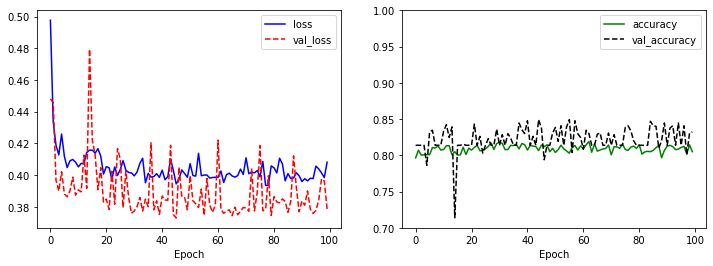

In [27]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [28]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 679us/step - loss: 0.3898 - accuracy: 0.8138


[0.38975149393081665, 0.8138461709022522]

---> 이러한 경우에는 좀 더 향상을 할 수 있는 방법을 고민을 해야한다. 네트워크 구조 변경, 학습률 변경 등...

# 5.3 Fashion MNIST

<img src="https://drive.google.com/uc?id=1_axH4QGvO9sH34AzX1TTvhi15k-e8eUJ">

<img src="https://drive.google.com/uc?id=16aESc_8JOYsgCLSrWy2A8XuTAExteYQ3">

In [29]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4431872/4422102 [==============================] - 1s 0us/step
60000 10000


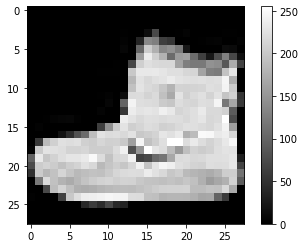

9


In [30]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [31]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [32]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    # ML했던 방식대로 DF로 꼭 만들어서 할 필요는 없다
    # 주어진 입력대로 받고,,내가 Flatten Layer 를 활용해서 피면된다
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 5.23 Fashion MNIST 분류 모델 학습
# 앞의 일반적인 데이터보다 특징의 수가 늘어나게 되어서 오래걸림.
history = model.fit(train_X, train_Y, epochs=50, validation_split=0.25)

Epoch 1/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5301 - accuracy: 0.8138 - val_loss: 0.4317 - val_accuracy: 0.8489
Epoch 2/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3971 - accuracy: 0.8579 - val_loss: 0.3810 - val_accuracy: 0.8617
Epoch 3/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3536 - accuracy: 0.8713 - val_loss: 0.3606 - val_accuracy: 0.8679
Epoch 4/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3252 - accuracy: 0.8807 - val_loss: 0.3394 - val_accuracy: 0.8748
Epoch 5/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.8884 - val_loss: 0.3537 - val_accuracy: 0.8687
Epoch 6/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2880 - accuracy: 0.8929 - val_loss: 0.3278 - val_accuracy: 0.8823
Epoch 7/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2764 - accuracy: 0.8985 - val_loss: 0.3389 - val_accuracy:

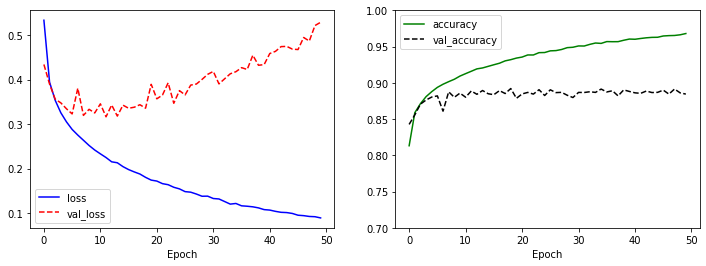

In [ ]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 5.25 Fashion MNIST 분류 모델 평가
# ---> 뒤의 여러가지 방법들을 사용하면 더 높일 수 있음!!!
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.5893 - accuracy: 0.8770


[0.5893109440803528, 0.8769999742507935]